In [3]:
pip install python-graphviz #This will error 

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn graphviz matplotlib ipykernel

In [4]:
from sklearn import tree  # Import the tree module for decision tree functionalities.
from sklearn.datasets import load_iris  # Import load_iris to get the iris dataset.

# Example 1: Basic Classification with DecisionTreeClassifier
X = [[0, 0], [1, 1]]  # Sample feature data.
Y = [0, 1]  # Corresponding target labels.

clf = tree.DecisionTreeClassifier()  # Initialize a decision tree classifier.
clf = clf.fit(X, Y)  # Train the classifier with the sample data.

prediction = clf.predict([[2., 2.]])  # Predict the class for a new data point.
print(prediction)  # Print the predicted class, which is [1].

probabilities = clf.predict_proba([[2., 2.]])  # Predict probabilities for each class.
print(probabilities)  # Print the predicted probabilities, which is [[0., 1.]].

# Example 2: Using the Iris Dataset
iris = load_iris()  # Load the iris dataset.
X, y = iris.data, iris.target  # Assign features (X) and target (y).

clf = tree.DecisionTreeClassifier()  # Initialize another decision tree classifier.
clf = clf.fit(X, y)  # Train the classifier with the iris dataset.

[1]
[[0. 1.]]


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

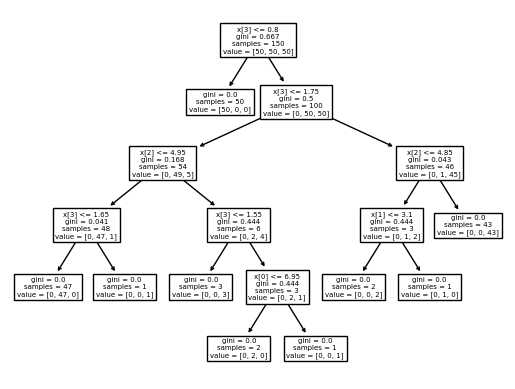

In [5]:
tree.plot_tree(clf)

In [ ]:

This notebook provides examples of:

Basic Decision Tree Training and Visualization: Trains a basic DecisionTreeClassifier and visualizes the trained tree structure using matplotlib.

Train/Test Split and Evaluation: Demonstrates how to split your data into training and testing sets and evaluate the model's performance using the score method (which calculates accuracy for classification).

Cross-Validation: Shows how to use cross_val_score for more robust evaluation using k-fold cross-validation.

Parameter Tuning (max_depth example): Provides a simple example of tuning the max_depth parameter using cross-validation to find the optimal depth that balances model complexity and performance. You can apply this same approach to tune other hyperparameters like min_samples_split, min_samples_leaf, etc.

Feature Importance: Shows how to access the feature_importances_ attribute to understand which features are most influential in the decision-making process.

Cost Complexity Pruning: Demonstrates finding the optimal pruning parameter (ccp_alpha) using cost complexity pruning and cross-validation, which helps avoid overfitting. The example uses the training dataset to find the most appropriate value for alpha and then visualizes the pruned tree and outputs its feature importances. Additionally, it plots the accuracy scores against alpha values for training and test sets.

This more comprehensive example notebook will help you get a better understanding of DecisionTreeClassifier and its various functionalities, including training, evaluation, visualization, parameter tuning, and pruning techniques. Let me know if you have any other specific aspects you'd like to explore, or if you encounter any issues running the code!

In [ ]:
DecisionTreeClassifier and its methods in more detail, working through examples 
in a Jupyter Notebook.

DecisionTreeClassifier Deep Dive

Here's a breakdown of the DecisionTreeClassifier and some of its key parameters and methods with practical examples:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

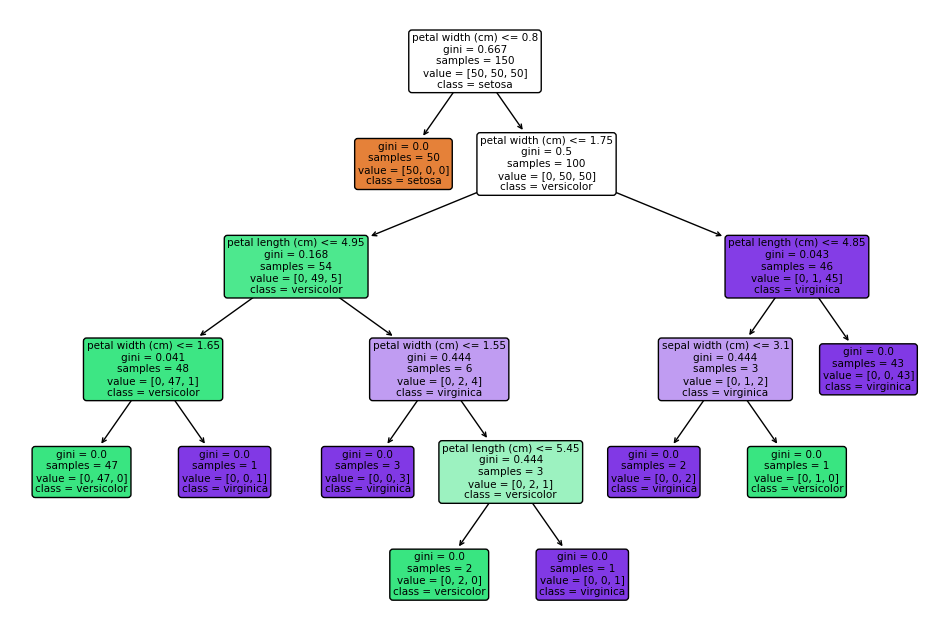

In [6]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 1. Basic Decision Tree
clf = DecisionTreeClassifier(random_state=0)  # Initialize the classifier
clf.fit(X, y)  # Train on the entire dataset (for demonstration)

# Visualize (using matplotlib – simpler than graphviz if you had issues earlier)
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True)
plt.show()


In [7]:
# 2. Train/Test Split and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 1.0


In [8]:
# 3. Cross-Validation
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=10) # 10-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
Average cross-validation score: 0.96


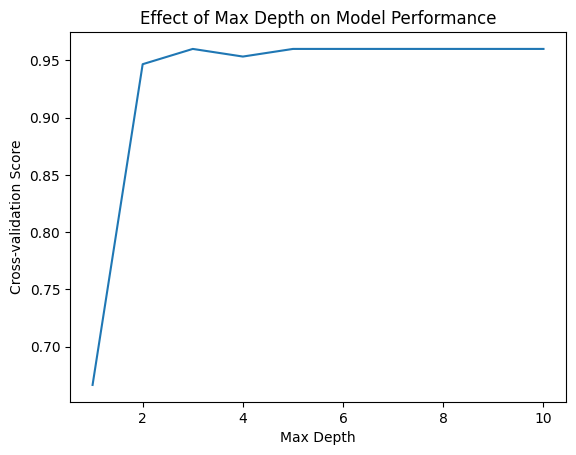

In [9]:
# 4. Parameter Tuning (Example: max_depth)
depths = range(1, 11)  # Explore different tree depths
cv_scores = []
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    cv_scores.append(scores.mean())

plt.plot(depths, cv_scores)
plt.xlabel("Max Depth")
plt.ylabel("Cross-validation Score")
plt.title("Effect of Max Depth on Model Performance")
plt.show()

In [ ]:
# 5. Feature Importance
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)
print(f"Feature importances: {clf.feature_importances_}")


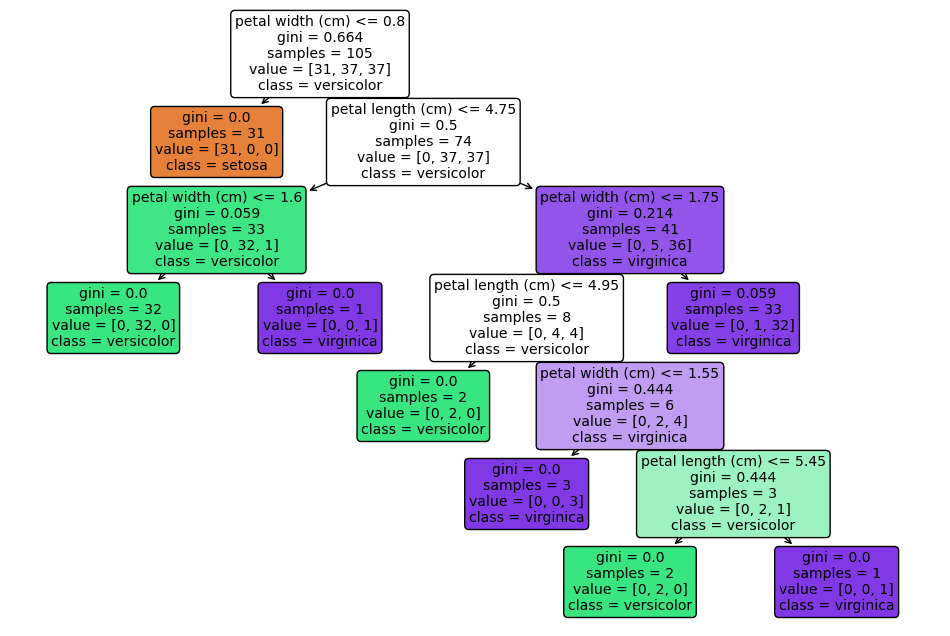

Feature importances pruned clf: [0.        0.        0.4267421 0.5732579]


In [12]:
# 6. Cost Complexity Pruning
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
# Find the best alpha (pruning parameter) using cross-validation on the training set.

# Example using the best alpha (you would determine this through cross-validation)
best_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012) # Example value
best_clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True)
plt.show()

print(f"Feature importances pruned clf: {best_clf.feature_importances_}")

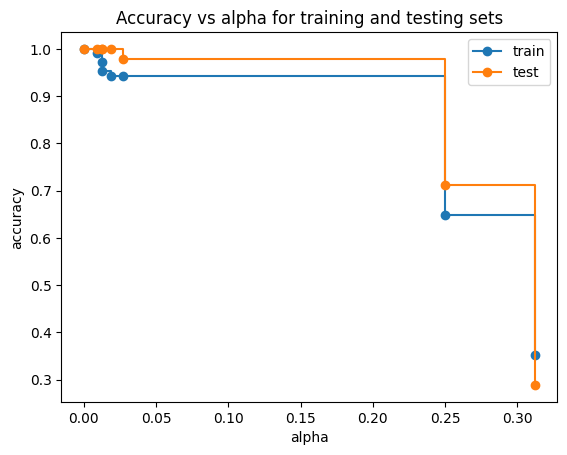

NameError: name 'content_copy' is not defined

In [13]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()